# plot_molecular_signal 

In [1]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
from rdkit import Chem
import matplotlib.pyplot as plt

# Add parent directory to path to import utils
sys.path.insert(0, str(Path.cwd().parent))
from utils.visualization_utils import plot_molecular_signal


In [2]:
# Load a test molecule
mol_path = Path.cwd().parent.parent / "data" / "molecular_structures" / "001_PR07117.mol"
mol = Chem.MolFromMolFile(str(mol_path), removeHs=False)

print(f"Loaded molecule: {mol.GetNumAtoms()} atoms")


Loaded molecule: 38 atoms


[11:45:28] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.


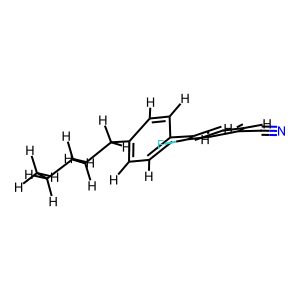

In [3]:
Chem.Draw.MolToImage(mol,moldraw2d=True)

In [4]:
# Load charges from CSV
charges_path = Path.cwd().parent.parent / "data" / "dft_results" / "001_PR07117" / "charges.csv"
xyz_path = Path.cwd().parent.parent / "data" / "dft_results" / "001_PR07117" / "geometry.xyz"
charges_df = pd.read_csv(charges_path)
charges = charges_df['charge'].values
print(f"Loaded {len(charges)} charges")
print(f"Charge range: [{charges.min():.3f}, {charges.max():.3f}]")


Loaded 38 charges
Charge range: [-0.432, 0.361]


/home/vpalacio/Documents/repos/PolarNematic/src/utils/visualization_utils.py:127: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


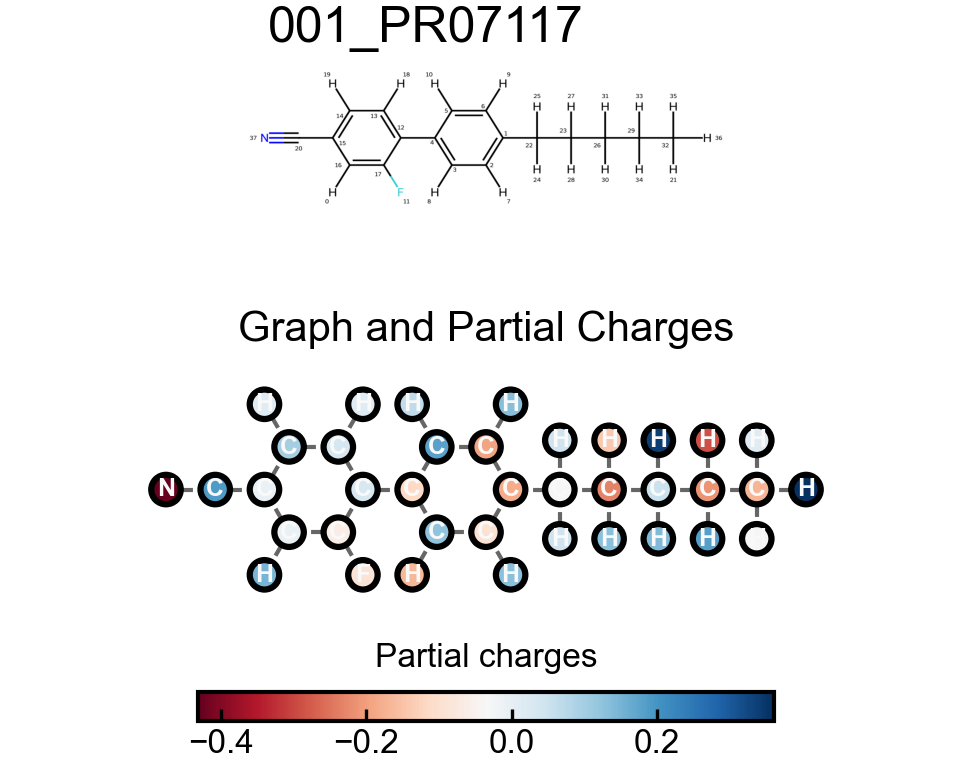

In [5]:
# Default: shows both structure and signal
fig = plot_molecular_signal(mol, charges, 
                           title='001_PR07117')
plt.show()
